## 1. Problem Statement
The task is to develop a predictive model that estimates house prices based on various features provided in a real estate dataset. Various linear and non-linear regression models will be trained, evaluated, and optimized using techniques such as cross-validation and hyperparameter tuning. The goal is to identify the model that provides the best predictive performance, which will then be used to predict house prices on a separate test dataset.

### 2. Import data and necessary libraries

In [49]:
# Data Exploration libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

#Data preprocessing
import missingno as msno
from sklearn.preprocessing import RobustScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel

#Modelling
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

In [3]:
#Import data
data = pd.read_csv('train.csv')
data_original = data.copy()
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
### 3. Basic EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#data.duplicated().sum()

In [7]:
#data.columns

In [8]:
data.drop('Id', axis=1, inplace=True)

In [9]:

# Numerical Variables
num_vars = data.select_dtypes (include = [np.number]).columns
#num_vars

In [10]:
#Categorical Columns
cat_vars = data.select_dtypes(include = ['object']).columns

##### 3.1 Explore the missingness

In [11]:

#Misssingess in numerical columns
num_missing = data[num_vars].isnull().mean()*100
# Filter to show only columns with missing values
num_missing = num_missing[num_missing > 0]
num_missing

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [12]:
#Misssingess in categorical columns
cat_missing = data[cat_vars].isnull().mean()*100
# Filter to show only columns with missing values
cat_missing = cat_missing[cat_missing > 0]
cat_missing


Alley           93.767123
MasVnrType      59.726027
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

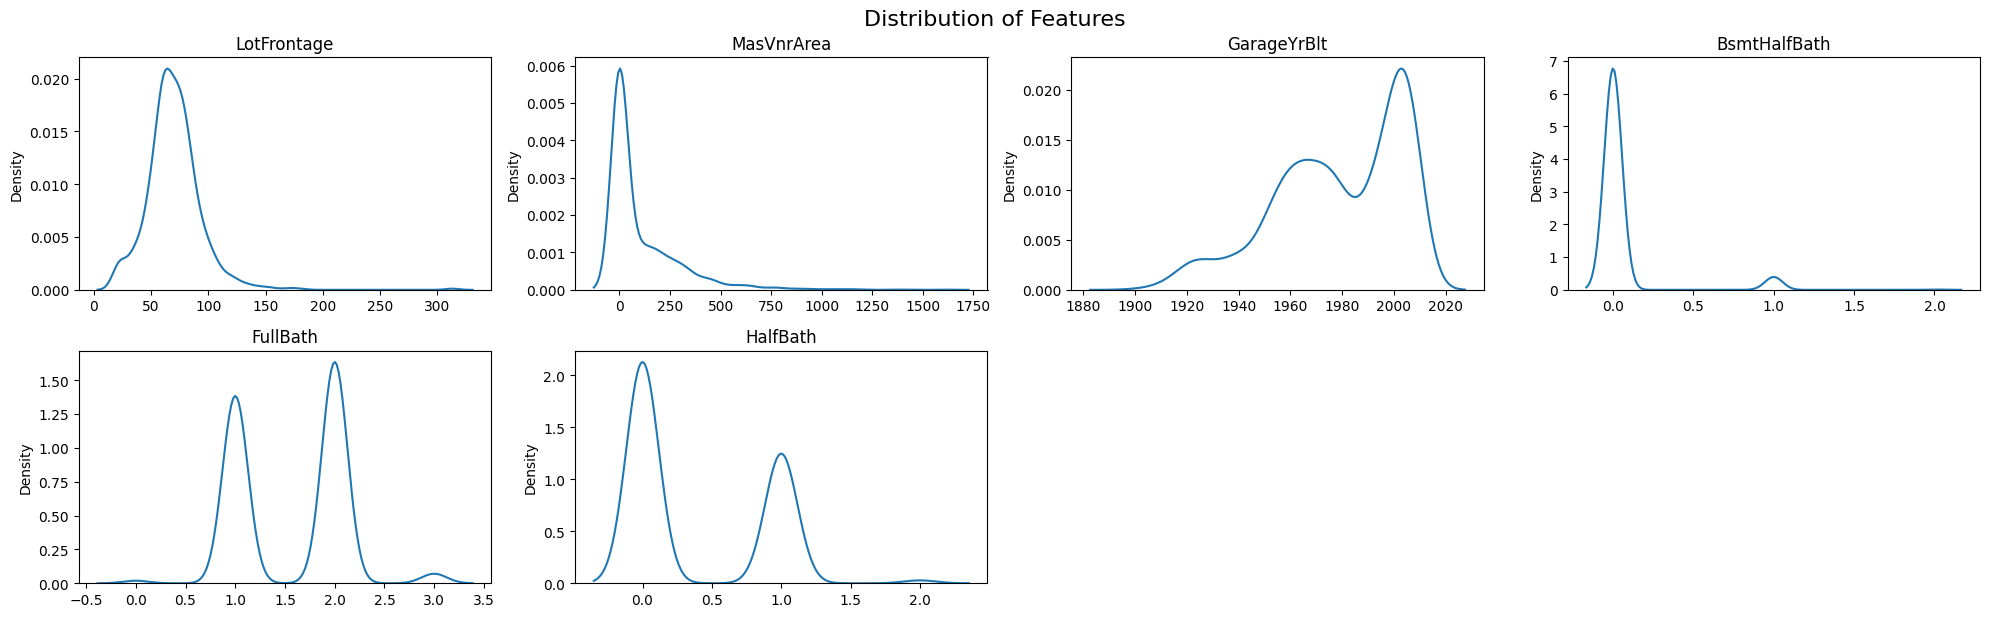

In [13]:
columns = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'BsmtHalfBath', 'FullBath', 'HalfBath',]
# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 12))
fig.suptitle('Distribution of Features', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each feature
for i, column in enumerate(columns):
    sns.kdeplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 4. Data Preprocessing

#### 4.1 Handling missingness

In [14]:
# select columns to drop based on a threshold
columns_to_drop = cat_missing[cat_missing > 50].index
columns_to_drop

data.drop(columns_to_drop, axis=1, inplace=True)

<Axes: >

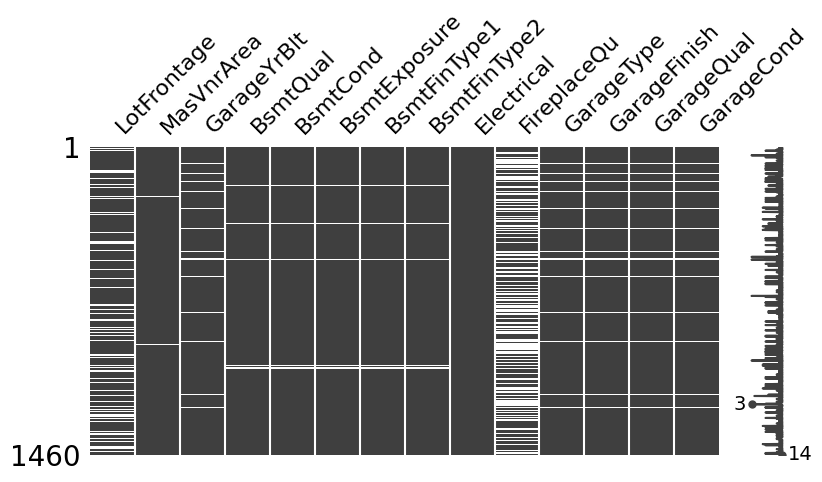

In [15]:

columns_with_missing_values = data[
 [  'LotFrontage',
   'MasVnrArea', 
   'GarageYrBlt',
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "Electrical",
    "FireplaceQu",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
 ]
]
msno.matrix(columns_with_missing_values, figsize=(9,4))

In [16]:
# Split the data
X = data.drop(columns='SalePrice', axis=1)
y = data['SalePrice']

In [17]:
# Handle missing values
for col in X.select_dtypes(include=['number']).columns:
    X[col].fillna(X[col].median(), inplace=True)

for col in X.select_dtypes(include=['object']).columns:
    X[col].fillna(X[col].mode()[0], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14572\2868288544.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_14572\2868288544.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

#### 4.2 Encoding

In [18]:
one_hot_columns = ['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 
                   'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
                   'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                   'Heating', 'SaleType', 'SaleCondition', 'Street', 'CentralAir']

ordinal_columns = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 
                   'HeatingQC', 'KitchenQual', 'Functional', 'PavedDrive']


In [19]:
# Define the ordinal mappings
ordinal_mappings = {
    'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
    'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
    'LandSlope': ['Gtl', 'Mod', 'Sev'],
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'PavedDrive': ['N', 'P', 'Y']
}

#Onehot Encoding
onehot = OneHotEncoder(handle_unknown='ignore')
X_onehot = onehot.fit_transform(X[one_hot_columns])

# Ordinal Encoding
ordinal = OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_columns])
X_ordinal = ordinal.fit_transform(X[ordinal_columns])

# Convert one-hot encoded data to dense array and combine with ordinal encoded data
X_encoded = np.hstack([X_onehot.toarray(), X_ordinal])


#### 4.3 Scaling

In [20]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [21]:
X_scaled.shape, X.shape

((1460, 169), (1460, 74))

#### 4.4 Feature Selection using Model-based Approach

In [50]:
# Using Lasso to select features (Lasso has built-in regularization)
lasso_selector = SelectFromModel(Lasso(alpha=0.01, random_state=42))
X_selected = lasso_selector.fit_transform(X_scaled, y)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.212e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


#### 4.5 Dimensionality reduction

In [51]:
pca = PCA()
X_pca = pca.fit(X_encoded)

Text(0.5, 1.0, 'Explained Variance vs N-Components')

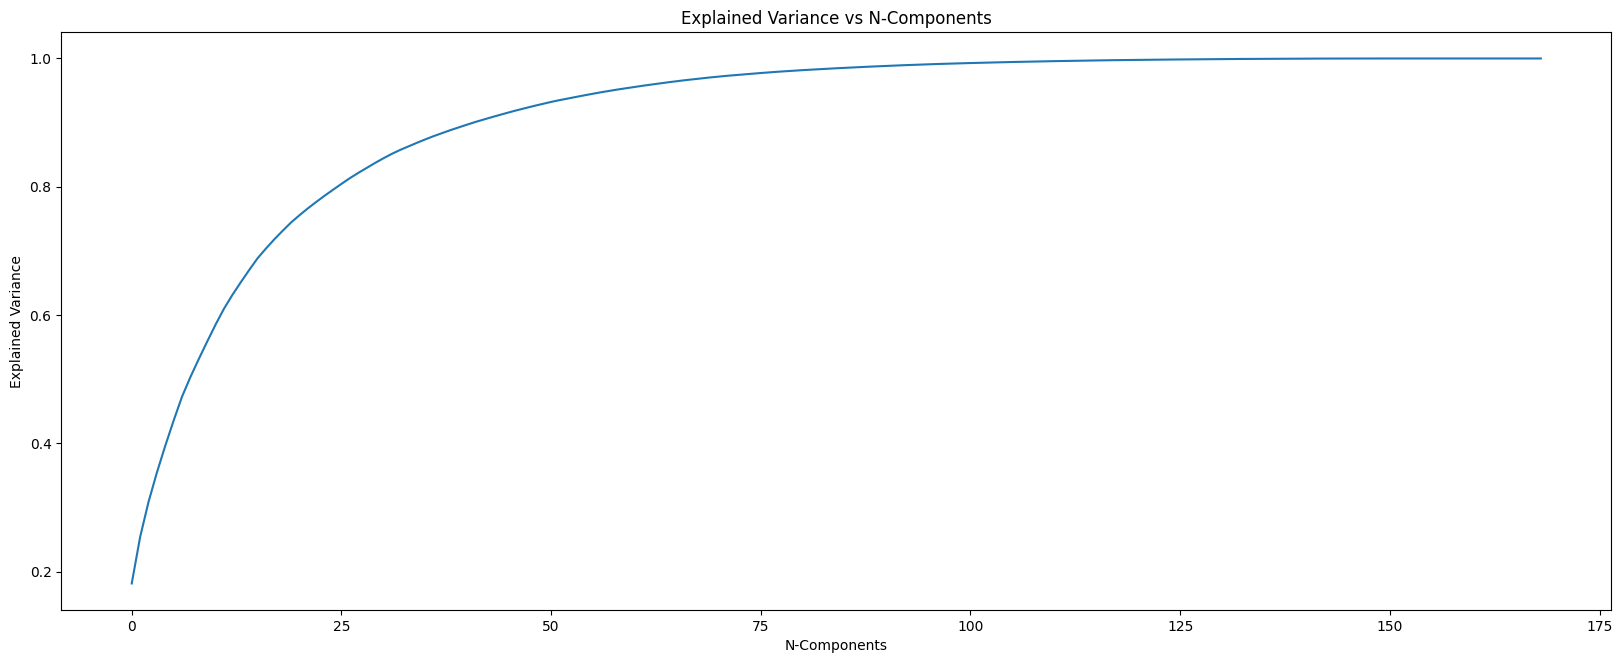

In [52]:
variance = X_pca.explained_variance_ratio_
components = np.arange(len(variance))

plt.figure(figsize=(20,7.5))
plt.plot(components, np.cumsum(variance))
plt.ylabel("Explained Variance"), plt.xlabel("N-Components")
plt.title("Explained Variance vs N-Components")

In [96]:
# select the ideal number of features for modelling
pca = PCA(n_components=75)
X_pca = pca.fit(X_scaled)
print("Total Explained Variance: ", np.cumsum(X_pca.explained_variance_ratio_)[-1])

Total Explained Variance:  0.9745508090059137


In [97]:
X_pca = pca.fit_transform(X_scaled)
X = pd.DataFrame(X_pca)

## 5. Modelling

#### 5.1 Linear Models: LinearRegression, Lasso, Ridge, ElasticNet

In [57]:
# Linear Regression
pipe_lr = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
lr_r2_scores= cross_val_score(pipe_lr, X, y, cv=5, scoring="r2")
print("Linear Regression Scores:",lr_r2_scores,lr_r2_scores.mean())

Linear Regression Scores: [0.69071719 0.68714178 0.67221566 0.67370718 0.62438527] 0.6696334181501916


In [58]:
# Lasso Regression
pipe_lasso = make_pipeline(PolynomialFeatures(degree=1), Lasso())
lasso_r2_scores = cross_val_score(pipe_lasso, X, y, cv=5, scoring="r2")
print("Lasso Regression R2 Score:",lasso_r2_scores, lasso_r2_scores.mean())

Lasso Regression R2 Score: [0.69077729 0.68718316 0.67219495 0.67374471 0.6243781 ] 0.6696556429874776


In [59]:
# Ridge Regression
pipe_ridge = make_pipeline(PolynomialFeatures(degree=1), Ridge())
ridge_r2_scores = cross_val_score(pipe_ridge, X, y, cv=5, scoring="r2")
print("Ridge Regression R2 Score:", ridge_r2_scores,ridge_r2_scores.mean())



Ridge Regression R2 Score: [0.69193351 0.68751552 0.67196719 0.67429666 0.62426197] 0.6699949689209019


In [60]:
# ElasticNet Regression
pipe_elasticnet = make_pipeline(PolynomialFeatures(degree=1), ElasticNet())
elasticnet_r2_scores = cross_val_score(pipe_elasticnet, X, y, cv=5, scoring="r2")
print("ElasticNet Regression R2 Score:", elasticnet_r2_scores, elasticnet_r2_scores.mean())


ElasticNet Regression R2 Score: [0.600655   0.57433457 0.53230816 0.58415548 0.49185269] 0.5566611811788401


#### 5.2 Non-linear Models: RF, GradientBoost, SVR

In [61]:
# Random Forest Regressor
pipe_rf = make_pipeline(PolynomialFeatures(degree=1), RandomForestRegressor(random_state=42))
rf_r2_scores = cross_val_score(pipe_rf, X, y, cv=5, scoring="r2")
print("Random Forest R2 Score:",ridge_r2_scores, rf_r2_scores.mean())

Random Forest R2 Score: [0.69193351 0.68751552 0.67196719 0.67429666 0.62426197] 0.6655203736392852


In [98]:
# Gradient Boosting Regressor
pipe_gb = make_pipeline(PolynomialFeatures(degree=1), GradientBoostingRegressor(random_state=42))
gb_r2_scores = cross_val_score(pipe_gb, X, y, cv=5, scoring="r2")
print("Gradient Boosting R2 Score:",gb_r2_scores, gb_r2_scores.mean())

Gradient Boosting R2 Score: [0.71854576 0.7051727  0.73058714 0.72295214 0.60215948] 0.6958834416856432


In [99]:
# XGBoost Regressor
pipe_xgb = make_pipeline(PolynomialFeatures(degree=1), XGBRegressor(objective='reg:squarederror', random_state=42))
xgb_r2_scores = cross_val_score(pipe_xgb, X, y, cv=5, scoring="r2")
print("XGBoost R2 Score:", xgb_r2_scores, xgb_r2_scores.mean())

XGBoost R2 Score: [0.70781183 0.69997847 0.64635777 0.66957772 0.58668232] 0.6620816230773926


In [63]:
# Support Vector Regressor (SVR)
pipe_svr = make_pipeline(PolynomialFeatures(degree=1), SVR())
scores_svr = cross_val_score(pipe_svr, X, y, cv=5, scoring="r2")
print("SVR Scores:", scores_svr)
print("SVR Mean R^2:", scores_svr.mean())

SVR Scores: [-0.06981531 -0.06011487 -0.05575831 -0.01531523 -0.05454838]
SVR Mean R^2: -0.05111041891453336


## 6. Hyperparameter tuning

In [100]:
# Define the parameter grid
param_grid = {
    'gradientboostingregressor__n_estimators': [100, 200, 300],
    'gradientboostingregressor__learning_rate': [0.01, 0.05, 0.1],
    'gradientboostingregressor__max_depth': [3, 4, 5],
    'gradientboostingregressor__min_samples_split': [2, 5, 10],
    'gradientboostingregressor__min_samples_leaf': [1, 2, 4],
    'gradientboostingregressor__subsample': [0.8, 1.0]
}

In [101]:
# Setup the Randomized Search
random_search_gb = RandomizedSearchCV(pipe_gb, param_grid, n_iter=20, cv=5, scoring='r2', n_jobs=-1, random_state=42, verbose=1)


In [102]:
# Fit the model
random_search_gb.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(degree=1)),
                                             ('gradientboostingregressor',
                                              GradientBoostingRegressor(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'gradientboostingregressor__learning_rate': [0.01,
                                                                                     0.05,
                                                                                     0.1],
                                        'gradientboostingregressor__max_depth': [3,
                                                                                 4,
                                                                                 5],
                                        'gradientboostingregressor__min_samples_leaf': [1,
                                                                                        2,
                                                                                        4],
                                        'gradientboostingregressor__min_samples_split': [2,
                                                                                         5,
                                                                                         10],
                                        'gradientboostingregressor__n_estimators': [100,
                                                                                    200,
                                                                                    300],
                                        'gradientboostingregressor__subsample': [0.8,
                                                                                 1.0]},
                   random_state=42, scoring='r2', verbose=1)

In [103]:
# Get the best parameters
random_search_gb.best_params_

{'gradientboostingregressor__subsample': 1.0,
 'gradientboostingregressor__n_estimators': 200,
 'gradientboostingregressor__min_samples_split': 10,
 'gradientboostingregressor__min_samples_leaf': 4,
 'gradientboostingregressor__max_depth': 4,
 'gradientboostingregressor__learning_rate': 0.1}

In [104]:
#Get best score
random_search_gb.best_score_

0.7202081113286061

In [105]:
## Optimal model
best_gb_model = random_search_gb.best_estimator_

## 7. Handling the Test Data

In [106]:
test_data = pd.read_csv('test.csv')

In [107]:
#Extract test ids
test_ids = test_data['Id']

In [108]:
# Drop the 'Id' column
test_data.drop('Id', axis=1, inplace=True)

In [109]:
# Identify numerical and categorical columns
num_vars_test = test_data.select_dtypes(include=[np.number]).columns
cat_vars_test = test_data.select_dtypes(include=['object']).columns

In [110]:
# Handling missing values in numerical columns
for col in test_data.select_dtypes(include=['number']).columns:
    test_data[col].fillna(test_data[col].median(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14572\3589423924.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[col].fillna(test_data[col].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_14572\3589423924.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [111]:
# Handling missing values in categorical columns by filling with mode
for col in test_data.select_dtypes(include=['object']).columns:
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14572\1786690365.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[col].fillna(test_data[col].mode()[0], inplace=True)


In [112]:
# Encoding
one_hot_columns = ['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 
                   'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
                   'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                   'Heating', 'SaleType', 'SaleCondition', 'Street', 'CentralAir']


ordinal_columns = ['LotShape', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 
                   'HeatingQC', 'KitchenQual', 'Functional', 'PavedDrive']

ordinal_mappings = {
    'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
    'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
    'LandSlope': ['Gtl', 'Mod', 'Sev'],
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'PavedDrive': ['N', 'P', 'Y']
}


In [113]:
# One hot encoding
onehot = OneHotEncoder(handle_unknown='ignore')
X_test_onehot = onehot.fit_transform(test_data[one_hot_columns])

#Ordinal encoding
ordinal = OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_columns])
X_test_ordinal = ordinal.fit_transform(test_data[ordinal_columns])

# Convert one-hot encoded data to dense array and combine with ordinal encoded data
X_test_encoded = np.hstack([X_test_onehot.toarray(), X_test_ordinal])

In [114]:
# Scale the data 
scaler = RobustScaler()
X_test_scaled = scaler.fit_transform(X_test_encoded)

In [117]:
#Dimensionality Reduction
pca = PCA(n_components=75)
X_test_pca = pca.fit_transform(X_test_scaled)
X_test_final = pd.DataFrame(X_test_pca)


#### 7.1 Making prediction on test data


In [118]:
test_predictions = best_gb_model.predict(X_test_final)

In [119]:
# Convert the predictions to a DataFrame
submission_df = pd.DataFrame({'Id': test_ids, 'SalePrice': test_predictions})

# Save predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)